<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
Covariance is a number that represent the linear relationship between two variables. Covariance is in the same scale is the data and it has the same dimension as the data.<br>Correlation is the normalised covariance. It has no dimension.</p>
</div>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [74]:
# Definitions:
def covariance(x, y):
    if len(x) != len(y):
        raise Exception('len(x) should equal len(y)')
    if len(x) <= 1:
        raise Exception('At least two data points expected.')
    n = len(x)
    x_ = np.mean(x)
    y_ = np.mean(y)

    return (1 / (n - 1)) * np.sum((x - x_) * (y - y_))

def correlation(x, y):
    if len(x) != len(y):
        raise Exception('len(x) should equal len(y)')
    x_ = np.mean(x)
    y_ = np.mean(y)
    numerator = np.sum((x - x_) * (y - y_))
    denominator = (np.sum((x - x_)**2)) * (np.sum((y - y_)**2))
    denominator = denominator ** 0.5
    return numerator / denominator

def pValue(x, y):
    r = correlation(x, y)
    n = len(x)
    return r * np.sqrt(n-2) / (1 - r**2)

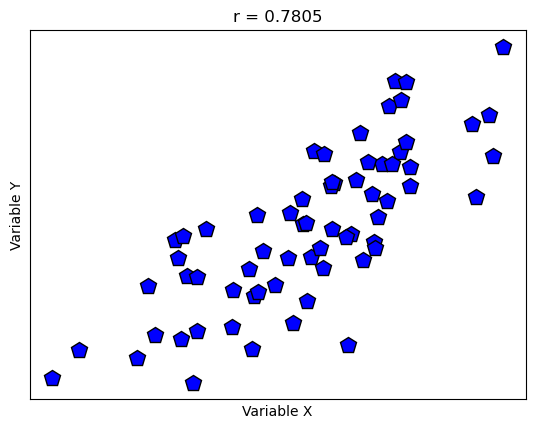

In [75]:
N = 66
x = np.random.randn(N)
y = x + np.random.randn(N)*0.9

plt.plot(x, y, 'kp', markerfacecolor='b', markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title(f'r = {np.round(correlation(x, y), 4)}')
plt.xticks([])
plt.yticks([])
plt.show()

In [76]:
print('Calculate covariance')
print(f'By hand: {covariance(x, y)}')
print(f'np:      {np.cov(np.vstack((x, y)))[0, 1]}') 
# np.cov() returns a matrix. In the main diagonal are the variances of x and y, the off-diagonal elements are both the same. It is the covariance.
# That's why the [0, 1] at the end.

Calculate covariance
By hand: 1.047731985084955
np:      1.047731985084955


In [77]:
print('Calculate correlation')
print(f'By hand: {correlation(x, y)}')
print(f'np:      {np.corrcoef(np.vstack((x, y)))[0, 1]}') 

Calculate correlation
By hand: 0.7804741155986259
np:      0.7804741155986259


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Generating data with specific correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
</p>
</div>

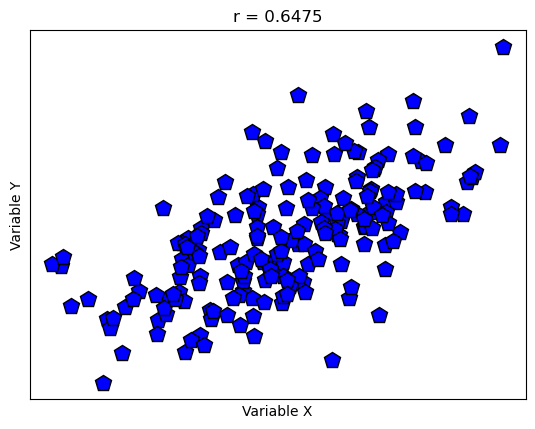

In [78]:
N = 200
r = .6

def sampleWithSpecifiedCorrelation(N, r):
    x = np.random.randn(N)
    y = np.random.randn(N)
    y = x*r + y*np.sqrt(1-r**2)
    return (x, y, r, correlation(x, y))

x, y, r, rEmp = sampleWithSpecifiedCorrelation(N, r)
plt.plot(x, y, 'kp', markerfacecolor='b', markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title(f'r = {np.round(rEmp, 4)}')
plt.xticks([])
plt.yticks([])
plt.show()

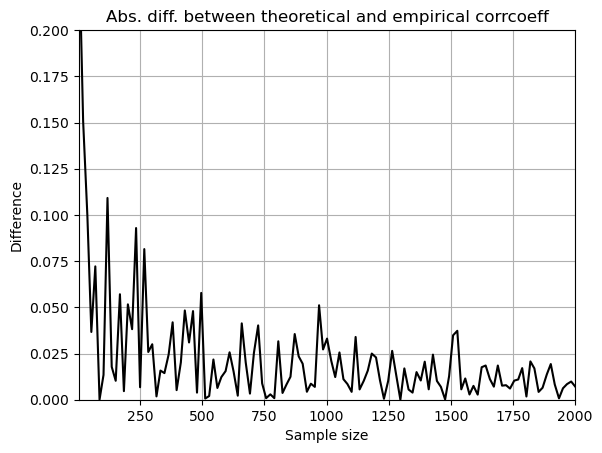

In [79]:
N = np.round(np.linspace(5, 2000, 123)).astype(int)
rEmp = [sampleWithSpecifiedCorrelation(n, r)[3] for n in N]

plt.plot(N, np.abs(np.array(rEmp)-r), 'k-')
plt.xlim((5, 2000))
plt.ylim((0, 0.2))
plt.grid()
plt.title('Abs. diff. between theoretical and empirical corrcoeff')
plt.xlabel('Sample size')
plt.ylabel('Difference')
plt.show()

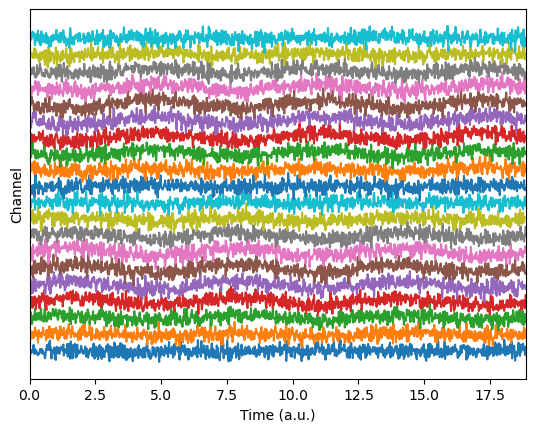

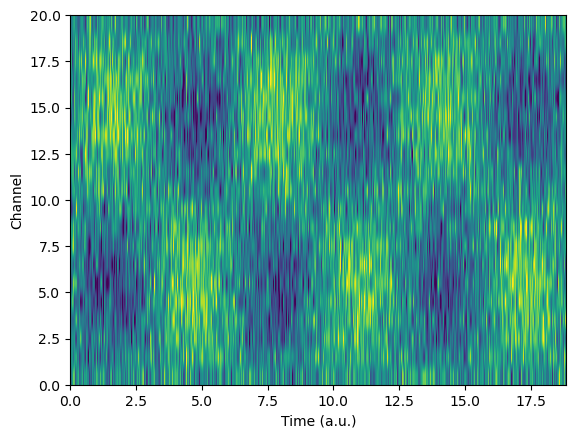

In [80]:
N = 1_000
M = 20

t = np.linspace(0, 6*np.pi, N)

chanrel = np.sin(np.linspace(0,2*np.pi,M))

data = np.zeros((M, N))
for i in range(M):
    data[i:] = np.sin(t) *chanrel[i]

data = data + np.random.randn(M, N)

for i in range(M):
    plt.plot(t, data[i,:]+i*4)

plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.xlim((np.min(t), np.max(t)))
plt.show()

plt.imshow(data, aspect='auto', vmin=-2, vmax=2, extent=[t[0], t[-1], 0, M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

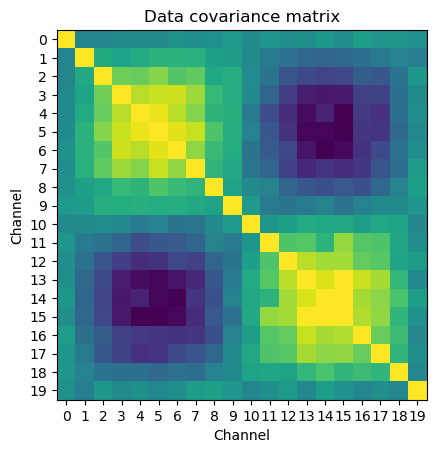

In [81]:
covarianceMatrix = np.cov(data)
plt.imshow(covarianceMatrix, vmin=-.5, vmax=.5)
plt.title('Data covariance matrix')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.xticks(range(20))
plt.yticks(range(20))
plt.show()

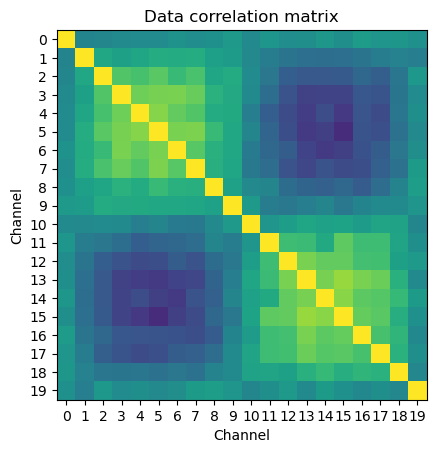

In [82]:
covarianceMatrix = np.corrcoef(data)
plt.imshow(covarianceMatrix, vmin=-.5, vmax=.5)
plt.title('Data correlation matrix')

plt.xticks(range(20))
plt.yticks(range(20))

plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Partial correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
We can measure the correlation between two variables with ruling out a third one. <br>Example: Correlation between ice cream consumption and shark attacks ruling out the weather.</p>
</div>

In [83]:
# Returns partial correlation between x and y ruling out z
def partialCorrelation(x, y, z):
    num = correlation(x, y) - correlation(x, z) * correlation(y, z)
    den = np.sqrt(1 - correlation(x, z)**2) * np.sqrt(1 - correlation(y, z)**2)
    return num / den


In [84]:
N = 100

x1 = np.linspace(1, 10, N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 + np.random.randn(N)

df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3
print(df.corr())

          x1        x2        x3
x1  1.000000  0.925428  0.930358
x2  0.925428  1.000000  0.857851
x3  0.930358  0.857851  1.000000


In [85]:
partialCorr = partialCorrelation(x2, x3, x1)
print(partialCorr)

-0.022516360780073574


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Spearman correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">The correlation discussed above is Pearson. It is very sensitive to outliers and nonlinear relations. Spearman is not sensitive to outliers.<br>It tests for a monotonic relationship, regardless whether it is linear or not.<br>When calculating Spearman correlation, we transform the data to ranks, and apply Pearson on that one.</p>
</div>

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Kendall correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">It can be used for ordinal (sortable categoric) data.</p>
</div>

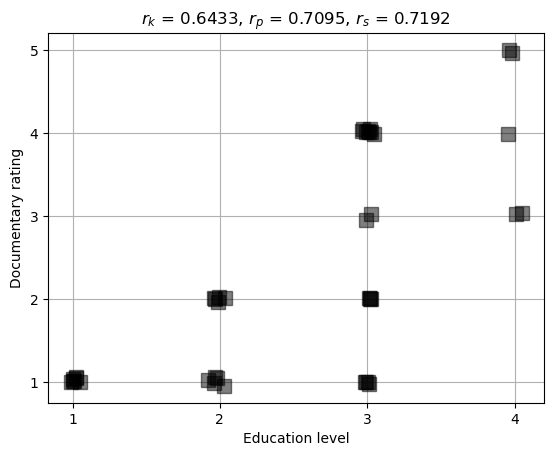

In [86]:
N = 40

documentaryRatings = np.random.randint(low=1, high=6, size=N)
educationLevel = np.ceil((documentaryRatings + np.random.randint(low=1, high=5, size=N)) / 9 * 4)

correlations = [0, 0, 0]
correlations[0] = stats.kendalltau(educationLevel, documentaryRatings)[0]
correlations[1] = stats.pearsonr(educationLevel, documentaryRatings)[0]
correlations[2] = stats.spearmanr(educationLevel, documentaryRatings)[0]
correlations = np.round(correlations, 4)

plt.plot(educationLevel + np.random.randn(N) / 30, documentaryRatings + np.random.randn(N) / 30, 'ks', markersize=10, markerfacecolor=[0, 0, 0, 0.5])
plt.xticks(np.arange(4) + 1)
plt.yticks(np.arange(5) + 1)
plt.grid()
plt.title('$r_k$ = %g, $r_p$ = %g, $r_s$ = %g'%(correlations[0], correlations[1], correlations[2]))
plt.xlabel('Education level')
plt.ylabel('Documentary rating')
plt.show()

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Cosine similarity</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">We treat each data as a line in a n-dimensional space and calculate the cosinus of the angle between them. It is similar to Pearson correlation.</p>
</div>

In [87]:
def cosineSimilarity(x, y):
    num = np.sum(x*y)
    den = np.sqrt(np.sum(x*x))
    den *= np.sqrt(np.sum(y*y))
    return num / den

In [92]:
N = 500
rs = np.linspace(-1, 1, 100)
correlations = np.zeros((len(rs), 2))

for ri in range(len(rs)):
    x = np.random.randn(N)
    x = x + 10
    # Uncommenting this line will stop x from being 0 centered, and will create a difference between correlation and cosine similarity
    y = x * rs[ri] + np.random.randn(N)*np.sqrt(1-rs[ri]**2)
    
    correlations[ri, 0] = correlation(x, y)
    correlations[ri, 1] = cosineSimilarity(x, y)

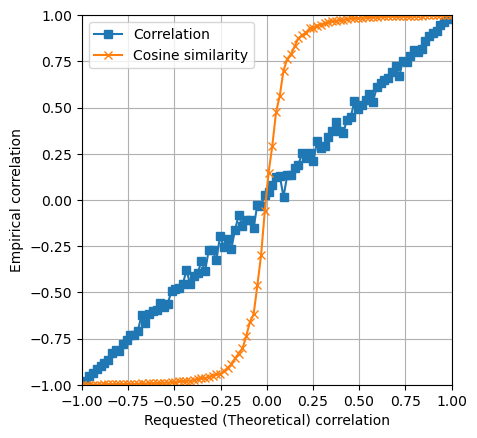

In [93]:
plt.plot(rs, correlations[:,0], 's-', label='Correlation')
plt.plot(rs, correlations[:,1], 'x-', label='Cosine similarity')
plt.legend()
plt.xlabel('Requested (Theoretical) correlation')
plt.ylabel('Empirical correlation')
plt.axis('square')
plt.grid()
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

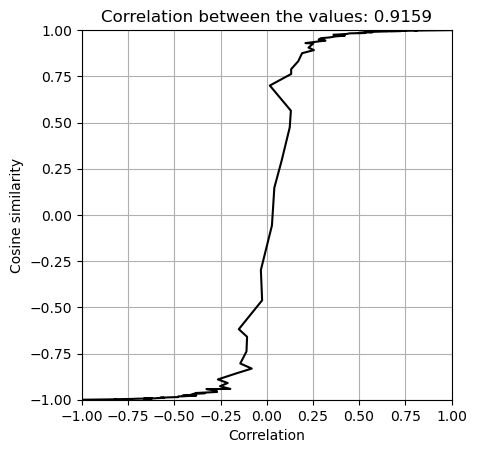

In [98]:
plt.plot(correlations[:, 0], correlations[:, 1], 'k-')
plt.grid()
plt.xlabel('Correlation')
plt.ylabel('Cosine similarity')
plt.axis('square')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title(f'Correlation between the values: {np.round(np.corrcoef(correlations[:,0], correlations[:, 1])[0, 1], 4)}')
plt.show()